In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
gdp_file = 'C:\\Users\\aanch\\Desktop\\Courses\\Info Viz\\ddf--gapminder--gdp_per_capita_cppp-master\\ddf--datapoints--gdp_per_capita_cppp--by--geo--time.csv'
income_df = pd.read_csv(gdp_file)
income_df = income_df[['time', 'gdp_per_capita_cppp']]
income_df.head()

,time,gdp_per_capita_cppp
0,1800,603
1,1801,603
2,1802,603
3,1803,603
4,1804,603


In [26]:
income_df = income_df.groupby(['time']).mean().reset_index()
income_df.head()

,time,gdp_per_capita_cppp
0,1800,946.288557
1,1801,946.661692
2,1802,949.452736
3,1803,949.194030
4,1804,950.751244


In [27]:
life_expectancy_file = 'C:\\Users\\aanch\\Desktop\\Courses\\Info Viz\\ddf--gapminder--systema_globalis-master\\ddf--gapminder--systema_globalis-master\\ddf--datapoints--life_expectancy_years--by--geo--time.csv'
life_expectancy_df = pd.read_csv(life_expectancy_file)
life_expectancy_df = life_expectancy_df[['time', 'life_expectancy_years']]
life_expectancy_df.head()

,time,life_expectancy_years
0,1800,34.42
1,1801,34.42
2,1802,34.42
3,1803,34.42
4,1804,34.42


In [28]:
life_expectancy_df = life_expectancy_df.groupby(['time']).mean().reset_index()
life_expectancy_df.head()

,time,life_expectancy_years
0,1800,31.486020
1,1801,31.448905
2,1802,31.463483
3,1803,31.377413
4,1804,31.446318


In [29]:
child_mortality_file = 'C:\\Users\\aanch\\Desktop\\Courses\\Info Viz\\ddf--gapminder--systema_globalis-master\\ddf--gapminder--systema_globalis-master\\ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv'
child_mortality_df = pd.read_csv(child_mortality_file)
child_mortality_df = child_mortality_df[['time', 'child_mortality_0_5_year_olds_dying_per_1000_born']]
child_mortality_df.head()

,time,child_mortality_0_5_year_olds_dying_per_1000_born
0,1950,109.309
1,1951,105.483
2,1952,98.120
3,1953,91.334
4,1954,85.126


In [31]:
child_mortality_df = child_mortality_df.groupby(['time']).mean().reset_index()
child_mortality_df.head()

,time,child_mortality_0_5_year_olds_dying_per_1000_born
0,1800,424.585598
1,1801,423.930755
2,1802,423.295315
3,1803,422.893000
4,1804,422.515913


In [36]:
data_income_life = pd.merge(income_df, life_expectancy_df, on=['time'])
data_income_life = data_income_life.rename(columns={"gdp_per_capita_cppp": "gdp_per_capita",
                                                    "life_expectancy_years":"life_expectancy_years"})
data_income_life.head()

,time,gdp_per_capita,life_expectancy_years
0,1800,946.288557,31.486020
1,1801,946.661692,31.448905
2,1802,949.452736,31.463483
3,1803,949.194030,31.377413
4,1804,950.751244,31.446318


In [35]:
data_income_mortality = pd.merge(income_df, child_mortality_df, on=['time'])
data_income_mortality = data_income_mortality.rename(columns={"gdp_per_capita_cppp": "gdp_per_capita",
                                                              "child_mortality_0_5_year_olds_dying_per_1000_born": "child_mortality"})
data_income_mortality.head()

,time,gdp_per_capita,child_mortality
0,1800,946.288557,424.585598
1,1801,946.661692,423.930755
2,1802,949.452736,423.295315
3,1803,949.194030,422.893000
4,1804,950.751244,422.515913


### Problem 5

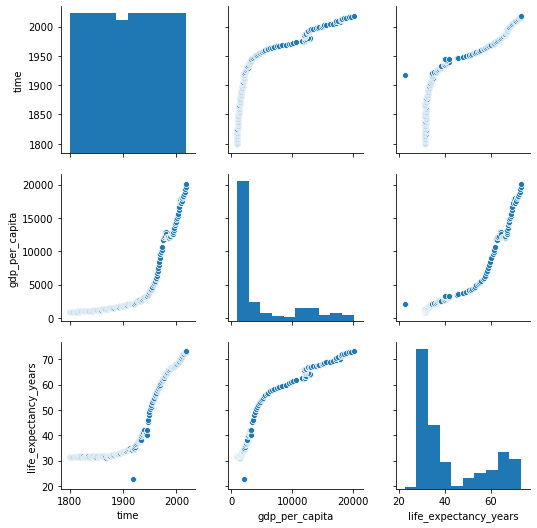

In [37]:
sns.pairplot(data_income_life)

In [38]:
data_income_life = data_income_life.assign(ln_gdp_per_capita = lambda x: np.log(x.gdp_per_capita))
data_income_life.head()

,time,gdp_per_capita,life_expectancy_years,ln_gdp_per_capita
0,1800,946.288557,31.486020,6.852548
1,1801,946.661692,31.448905,6.852942
2,1802,949.452736,31.463483,6.855886
3,1803,949.194030,31.377413,6.855613
4,1804,950.751244,31.446318,6.857252


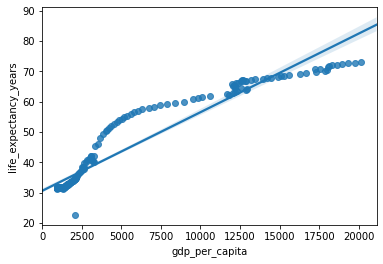

In [40]:
sns.regplot(x="gdp_per_capita", y="life_expectancy_years", data=data_income_life)

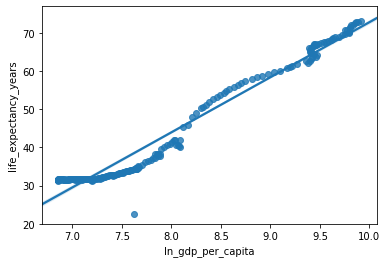

In [41]:
gdp_life_plot = sns.regplot(x="ln_gdp_per_capita", y="life_expectancy_years", data=data_income_life)

In [43]:
x_axis = data_income_life['gdp_per_capita']
x_axis = sm.add_constant(x_axis)
y_axis=data_income_life['life_expectancy_years']

In [44]:
a = sm.OLS(y_axis, x_axis, data=data_income_life).fit()
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.921
Model:                               OLS   Adj. R-squared:                  0.921
Method:                    Least Squares   F-statistic:                     2540.
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):          9.37e-122
Time:                           18:09:23   Log-Likelihood:                -621.20
No. Observations:                    219   AIC:                             1246.
Df Residuals:                        217   BIC:                             1253.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             30.5282      0.376     81.125      0.000      29.786      31.270
gdp_per_capita     0.0026   5.16e-05     50.397      0.000       0.002       0.003
==============================================================================
Omnibus:                       34.366   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.855
Skew:                           0.928   Prob(JB):                     1.49e-11
Kurtosis:                       4.421   Cond. No.                     9.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = data_income_life['ln_gdp_per_capita']
X = sm.add_constant(X)
y = data_income_life['life_expectancy_years']

In [46]:
results = sm.OLS(y, X, data=data_income_life).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     life_expectancy_years   R-squared:                       0.960
Model:                               OLS   Adj. R-squared:                  0.960
Method:                    Least Squares   F-statistic:                     5268.
Date:                   Mon, 28 Oct 2019   Prob (F-statistic):          3.55e-154
Time:                           18:09:40   Log-Likelihood:                -545.88
No. Observations:                    219   AIC:                             1096.
Df Residuals:                        217   BIC:                             1103.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -71.4284      1.592    -44.877      0.000     -74.565     -68.291
ln_gdp_per_capita    14.4227      0.199     72.579      0.000      14.031      14.814
==============================================================================
Omnibus:                       38.139   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.823
Skew:                          -0.859   Prob(JB):                     3.43e-17
Kurtosis:                       5.315   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Problem 4

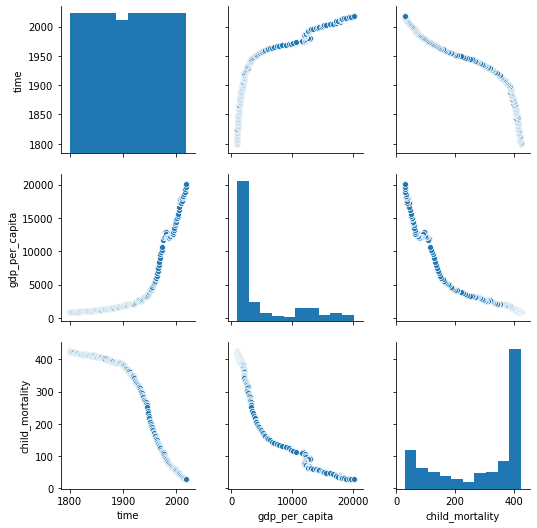

In [47]:
sns.pairplot(data_income_mortality)

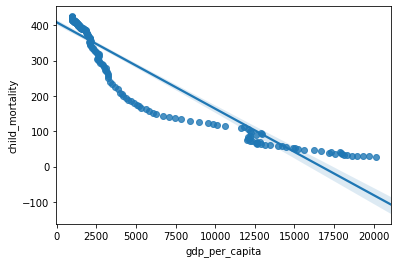

In [48]:
sns.regplot(x="gdp_per_capita", y="child_mortality", data=data_income_mortality)

In [49]:
x_axis = data_income_mortality['gdp_per_capita']
x_axis = sm.add_constant(x_axis)
y_axis=data_income_mortality['child_mortality']

In [50]:
a = sm.OLS(y_axis, x_axis, data=data_income_life).fit()
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        child_mortality   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1735.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.75e-105
Time:                        18:12:26   Log-Likelihood:                -1153.7
No. Observations:                 219   AIC:                             2311.
Df Residuals:                     217   BIC:                             2318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            408.2029      4.282     95.335      0.000     399.764     416.642
gdp_per_capita    -0.0244      0.001    -41.656      0.000      -0.026      -0.023
==============================================================================
Omnibus:                       21.329   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.051
Skew:                          -0.825   Prob(JB):                     3.63e-06
Kurtosis:                       3.159   Cond. No.                     9.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
data_income_mortality = data_income_mortality.assign(ln_gdp_per_capita = lambda x: np.log(x.gdp_per_capita))
data_income_mortality.head()

,time,gdp_per_capita,child_mortality,ln_gdp_per_capita
0,1800,946.288557,424.585598,6.852548
1,1801,946.661692,423.930755,6.852942
2,1802,949.452736,423.295315,6.855886
3,1803,949.194030,422.893000,6.855613
4,1804,950.751244,422.515913,6.857252


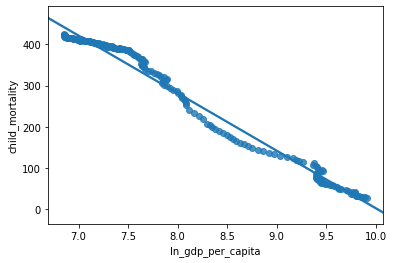

In [52]:
sns.regplot(x="ln_gdp_per_capita", y="child_mortality", data=data_income_mortality)

In [55]:
X = data_income_mortality['ln_gdp_per_capita']
X = sm.add_constant(X)
y = data_income_mortality['child_mortality']

In [56]:
results = sm.OLS(y, X, data=data_income_mortality).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        child_mortality   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          4.42e-193
Time:                        18:13:59   Log-Likelihood:                -950.24
No. Observations:                 219   AIC:                             1904.
Df Residuals:                     217   BIC:                             1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1399.1926     10.086    138.728      0.000    1379.314    1419.071
ln_gdp_per_capita  -139.6825      1.259   -110.928      0.000    -142.164    -137.201
==============================================================================
Omnibus:                       28.339   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.141
Skew:                           0.069   Prob(JB):                       0.0171
Kurtosis:                       2.066   Cond. No.                         65.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""